In [22]:
import osmnx as ox 
import geopandas as gpd
import pandas as pd 

import matplotlib.pyplot as plt

In [18]:
nyc = ox.graph_from_place('New York City, New York, USA', network_type='drive')

In [19]:
nyc_gdf = ox.utils_graph.graph_to_gdfs(nyc, edges=True, nodes=False)

In [20]:
nyc_gdf = nyc_gdf.to_crs(epsg=2263)

In [60]:
# custom filter for street parkign 
custom_filter = ('["parking:lane:parallel:condition"~"marked|unmarked"]'
                 '["parking:lane:both:condition"!~"no_stopping|fire_lane|private|delivery"]'
                 '["parking:lane:both:condition"~"free|time_restricted"]'
                 '["parking:lane:both:time_interval"~"."]')

parking_filter = '["parking:lane:both:time_interval"~"."]'

nyc_parking = ox.graph_from_place('New York City, New York, USA', network_type='all', retain_all=True, simplify=False, custom_filter='["parking:both"]')

In [61]:
nyc_parking_gdf = ox.utils_graph.graph_to_gdfs(nyc_parking, edges=True, nodes=False)

In [62]:
nyc_parking_gdf = nyc_parking_gdf.to_crs(epsg=2263)

(905655.4832883165, 1074949.5181688643, 113384.29431450776, 279285.10956600396)

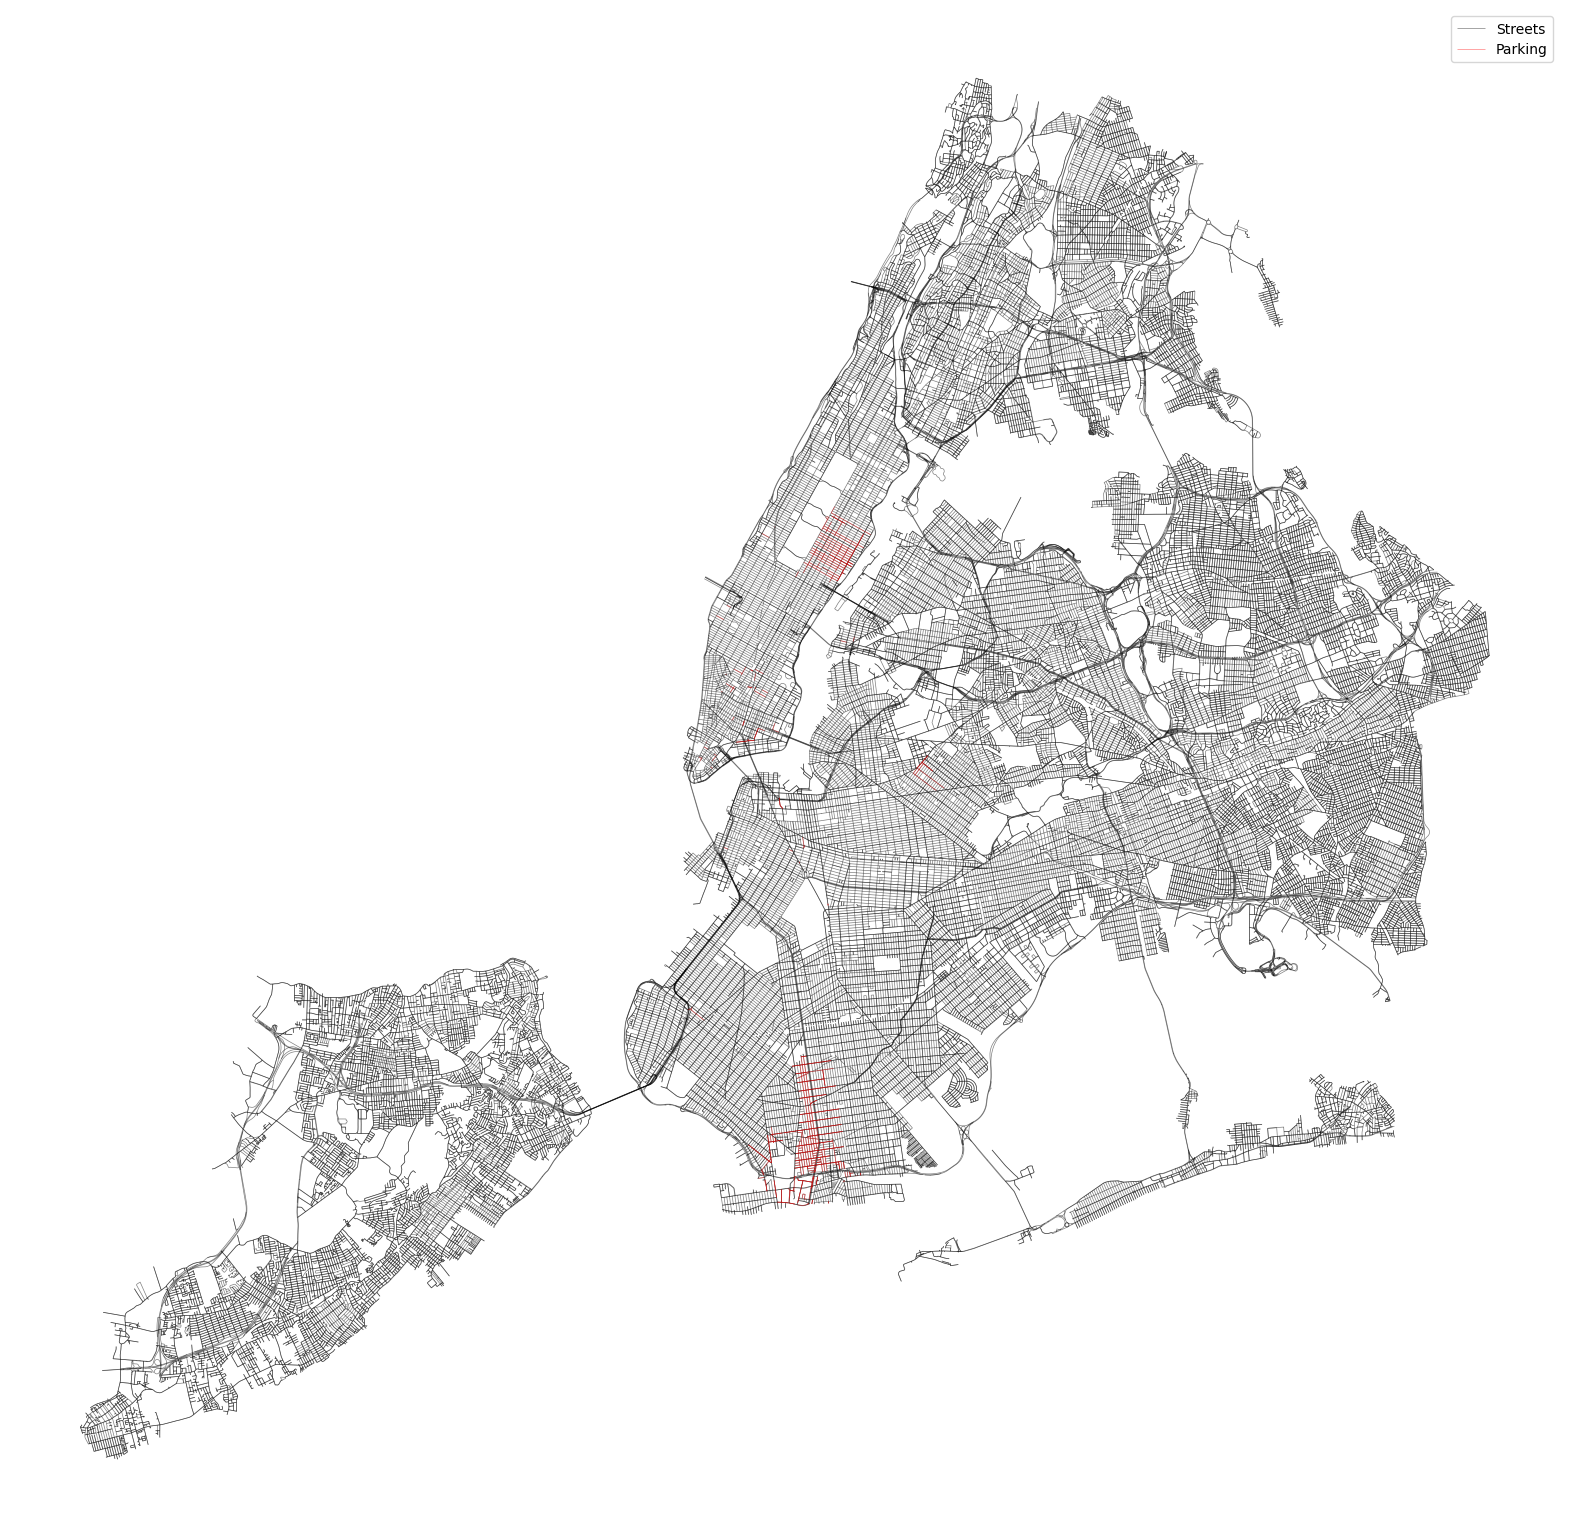

In [63]:
fig, ax = plt.subplots(figsize=(20,20))

nyc_gdf.plot(ax=ax, linewidth=0.5, color='black', alpha=0.5)
nyc_parking_gdf.plot(ax=ax, linewidth=0.5, color='red', alpha=0.5)

plt.legend(['Streets', 'Parking'])
plt.axis('off')

In [13]:
nyc_gdf.columns

Index(['osmid', 'oneway', 'highway', 'reversed', 'length', 'geometry', 'lanes',
       'ref', 'name', 'maxspeed', 'bridge', 'access', 'tunnel', 'width',
       'junction', 'est_width'],
      dtype='object')